In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
class pages:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.page_id=self.get_ids(d)
        self.title_part1=self.get_title_part1(d)
        self.title_part2=self.get_title_part2(d)
        self.short_description=self.get_short_description(d)
        self.description=self.get_description(d)
        self.create_df()
    
    def get_ids(self, x):
        res=[]
        for i in range(len(x)):
            res.append(int(x[i]["id"]))
        return res
    
    def get_title_part1(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title_part1"])
        return res
    
    def get_title_part2(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title_part2"])
        return res
    
    def get_short_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["description_short"])
        return res
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["content"])
        return res
    
    def create_df(self):
        dd={}
        dd["page_id"]=self.page_id
        dd["title_part1"]=self.title_part1
        dd["title_part2"]=self.title_part2
        dd["short_description"]=self.short_description
        dd["description"]=self.description
        self.df=pd.DataFrame(dd)

In [3]:
page=pages("page.json", "page")
page_df=page.df

In [4]:
page_df.head()

,page_id,title_part1,title_part2,short_description,description
0,3257,Expert Advice on Creating,The Ideal CV Layout,The importance of the CV layout cannot be unde...,<p>The importance of your&nbsp;CV layout canno...
1,2693,Linda Jones on,Female Diversity,Linda Jones speaks about the Sky initiative to...,<p>Linda Jones discusses Project Sky and outli...
2,3405,Sector:,Accounting & Finance,Apply for accounting & finance internships at ...,<h1><em>Which&nbsp;location do you want to wor...
3,233,Top Skills to Excel,In the Technology Sector,,<p>You don&#39;t have to be a world class prog...
4,87,Top Five Tips for,Creating a Successful Brand,,<p>There are misconceptions about how importan...


In [5]:
page_df.shape

(2529, 5)

In [6]:
content=page_df["description"].values

In [7]:
part_1=page_df["title_part1"].values

In [8]:
part_2=page_df["title_part2"].values

In [9]:
title=[]
for i in range(len(part_1)):
    title.append(part_1[i]+" "+part_2[i])

In [10]:
short_description=page_df["short_description"].values

In [11]:
def remove_pages(content):
    res=True
    if len(content)<10:
        res=False
    return res

In [12]:
def clean_page(title, content):
    content=content.replace("&bull;","\r\n ").replace("bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
    content=content.replace(".","\r\n ").replace(":","").replace("&lsquo;","").replace("lsquo;","")
    content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace("#39;s","")
    content=content.replace("&nbsp;"," ").replace("nbsp;"," ").replace("&#39;","").replace("#39;","")
    content=content.replace("amp;","").replace("&middot;","").replace("middot;","")
    content=content.replace(",","").replace("?","\r\n ").replace("!","\r\n ").replace("  "," ")
    content=content.replace("&rsquo;"," ").replace("rsquo;"," ").replace("\t"," ")
    content=content.replace("\r\n\r\n","\r\n ").replace(" \r\n ","\r\n ").replace("\r\n \r\n","\r\n")
    content=content.replace("&ndash;"," ").replace("ndash;"," ").replace("&pound;","").replace("pound;","")
    content=content.replace("  ","").replace("   ","").replace("  ","").replace("   ","")
    content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
    content=re.sub('<.*?>',"",content , flags=re.DOTALL)
    res=title.replace("?","").replace("!","").replace(".","")+"\r\n "+content
    res=res.replace("\r\n\r\n","").replace(" \r\n "," ").replace("&eacute;","e")
    res=res.replace("&ldquo;","").replace("ldquo;","").replace("&rdquo;","").replace("rdquo;","")
    res=''.join([i for i in res if not i.isdigit()])
    return res

In [13]:
data=[clean_page(title[i], content[i]) for i in range(len(content))]

In [14]:
len(data)

2529

In [15]:
data=[i for i in data if remove_pages(i)]

In [16]:
len(data)

2476

In [17]:
content[15]

'<p><strong>INTERNSHIPS COMING - CHECK BACK SOON</strong></p>'

In [18]:
data[11]

'CMS Cameron McKenna '

In [19]:
class jobs:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.description=self.get_description(d)
        self.title=self.get_title(d)
        self.create_df()
    
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["description"])
        return res
    
    def get_title(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title"])
        return res
    
    def create_df(self):
        dd={}
        dd["job_description"]=self.description
        dd["job_title"]=self.title
        self.df=pd.DataFrame(dd)

In [20]:
job=jobs("job.json", "job")
job_df=job.df

In [21]:
job_df.head()

,job_description,job_title
0,<h2>Overview</h2>\r\n\r\n<p>We are recruiting ...,Systems Engineer Graduate
1,<p>Slaughter and May is one of the most presti...,Training contract
2,"<p>As a Future Leader, you?ll get an unparalle...",Summer Placements
3,<h2>Internships at our international headquart...,International Internship Programme
4,<h2>Description</h2>\r\n\r\n<p>Our Electronics...,Graduate Electronics & Robotics Engineers


In [22]:
job_title=job_df["job_title"].values
job_description=job_df["job_description"].values

In [23]:
def clean_job(title, content):
    content=content.replace("&bull;","\r\n ").replace("bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
    content=content.replace(".","\r\n ").replace(":","").replace("&lsquo;","").replace("lsquo;","")
    content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace("#39;s","")
    content=content.replace("&nbsp;"," ").replace("nbsp;"," ").replace("&#39;","").replace("#39;","")
    content=content.replace("amp;","").replace("&middot;","").replace("middot;","")
    content=content.replace(",","").replace("?","\r\n ").replace("!","\r\n ").replace("  "," ")
    content=content.replace("&rsquo;"," ").replace("rsquo;"," ").replace("\t"," ")
    content=content.replace("\r\n\r\n","\r\n ").replace(" \r\n ","\r\n ").replace("\r\n \r\n","\r\n")
    content=content.replace("&ndash;"," ").replace("ndash;"," ").replace("&pound;","").replace("pound;","")
    content=content.replace("  ","").replace("   ","").replace("  ","").replace("   ","")
    content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
    content=re.sub('<.*?>',"",content , flags=re.DOTALL)
    res=title.replace("?","").replace("!","").replace(".","")+"\r\n "+content
    res=res.replace("\r\n\r\n","").replace(" \r\n "," ").replace("&eacute;","e")
    res=res.replace("&ldquo;","").replace("ldquo;","").replace("&rdquo;","").replace("rdquo;","")
    res=''.join([i for i in res if not i.isdigit()])
    return res

In [24]:
job_data=[clean_job(job_title[i], job_description[i]) for i in range(len(job_description))]

In [25]:
len(job_data)

3954

In [26]:
job_data=[i for i in job_data if remove_pages(i)]

In [27]:
len(job_data)

3954

In [28]:
job_data[75]

'Graduate Commercial Programme\r\n Learn from a team that have consistently scaled one of Europe fastest growing start-ups and closed deals with the largest organisations in the world while still in their s\r\n Tessian is looking for bright students like you to help us accomplish our ambitious vision of building the next-generation of information security\r\n Ready to start your career at a fast-growth technology start-up dont miss out apply today\r\n Programme overview\r\n As a member of our Inside Sales Team youll hit the ground running with the company most important task -- demand generation\r\n \r\n Help build a commercial machine kick-start the outbound selling process prospecting targeting developing and qualifying customers in a specified territory\r\n Learn how to manage a robust pipeline and working closely with Marketing and Direct Sales to unlock revenue\r\n Articulate the value proposition and help new customers understand how to improve their business s information securi

In [29]:
d=pd.read_csv("final_data.csv")

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3,6,7,8,9,12,13,14,15,16,17,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
employer_title=d['employer_title'].values
employer_description=d["employer_description"].values
employer_sector=d["employer_sector_title"].values

In [31]:
def clean_employer(title, content, sector):
    try:
        content=content.replace("&bull;","\r\n ").replace("bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
        content=content.replace(".","\r\n ").replace(":","").replace("&lsquo;","").replace("lsquo;","")
        content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace("#39;s","")
        content=content.replace("&nbsp;"," ").replace("nbsp;"," ").replace("&#39;","").replace("#39;","")
        content=content.replace("amp;","").replace("&middot;","").replace("middot;","")
        content=content.replace(",","").replace("?","\r\n ").replace("!","\r\n ").replace("  "," ")
        content=content.replace("&rsquo;"," ").replace("rsquo;"," ").replace("\t"," ")
        content=content.replace("\r\n\r\n","\r\n ").replace(" \r\n ","\r\n ").replace("\r\n \r\n","\r\n")
        content=content.replace("&ndash;"," ").replace("ndash;"," ").replace("&pound;","").replace("pound;","")
        content=content.replace("  ","").replace("   ","").replace("  ","").replace("   ","")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        content=re.sub('<.*?>',"",content , flags=re.DOTALL)
        res=title.replace("?","").replace("!","").replace(".","")+"\r\n "+sector+"\r\n "+content
        res=res.replace("\r\n\r\n","").replace(" \r\n "," ").replace("&eacute;","e")
        res=res.replace("&ldquo;","").replace("ldquo;","").replace("&rdquo;","").replace("rdquo;","")
        res=''.join([i for i in res if not i.isdigit()])
    except:
        res=""
    return res

In [32]:
employer_data=[clean_employer(employer_title[i], employer_description[i], employer_sector[i]) for i in range(len(employer_description))]

In [33]:
employer_data=[i for i in employer_data if remove_pages(i)]

In [34]:
employer_data = list(set(employer_data))

In [35]:
len(employer_data)

502

In [36]:
employer_data[75]

'Oliver Wyman\r\n Consulting With offices in more than  cities across  countries Oliver Wyman is one of the world fastest-growing strategy consulting firms combining deep industry knowledge with specialized expertise in strategy operations risk management and organizational transformation\r\n The firm + professionals partner with clients in industry sectors and regions of the world where our distinctive approach allows us to identify their highest-value opportunities address their most critical challenges and transform their businesses\r\n  When you join Oliver Wyman youll have the chance to make an impact from the moment you walk through our doors\r\n Our entrepreneurial culture gives you the opportunity to gain exposure to global clients collaborate with industry experts and our own senior Partners and make it all the way to Partner without having to leave the firm to get an advanced degree\r\n This means youll have an immediate impact not only on our clients but also on our own busi

In [37]:
university_name=d['university_name'].values
degree_subject_name=d["degree_subject_name"].values

In [38]:
def clean_uni(uni_name, degree_name):
    try:
        content=uni_name+" "+degree_name
    except:
        content=uni_name
    try:
        content=content.replace(".","\r\n ").replace(":","").replace("&lsquo;","").replace("lsquo;","")
        content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace("#39;s","")
        content=content.replace("&nbsp;"," ").replace("nbsp;"," ").replace("&#39;","").replace("#39;","")
        content=content.replace("amp;","").replace("&middot;","").replace("middot;","")
        content=content.replace(",","").replace("?","\r\n ").replace("!","\r\n ").replace("  "," ")
        content=content.replace("&rsquo;"," ").replace("rsquo;"," ").replace("\t"," ")
        content=content.replace("\r\n\r\n","\r\n ").replace(" \r\n ","\r\n ").replace("\r\n \r\n","\r\n")
        content=content.replace("&ndash;"," ").replace("ndash;"," ").replace("&pound;","").replace("pound;","")
        content=content.replace("  ","").replace("   ","").replace("  ","").replace("   ","")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        res=content+"\r\n "
        res=''.join([i for i in res if not i.isdigit()])
    except:
        res=""
    return res

In [39]:
uni_data=[clean_uni(university_name[i], degree_subject_name[i]) for i in range(len(university_name))]

In [40]:
uni_data=[i for i in uni_data if remove_pages(i)]

In [41]:
uni_data = list(set(uni_data))

In [42]:
len(uni_data)

18487

In [43]:
uni_data[45]

'Cass Business School Masters\r\n '

In [45]:
class success_story:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.description=self.get_description(d)
        self.title=self.get_title(d)
        self.create_df()
    
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["content"])
        return res
    
    def get_title(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title_part2"])
        return res
    
    def create_df(self):
        dd={}
        dd["success_description"]=self.description
        dd["success_title"]=self.title
        self.df=pd.DataFrame(dd)

In [46]:
story=success_story("success_story.json","success_story")
story_df=story.df

In [47]:
story_title=story_df["success_title"].values
story_description=story_df["success_description"].values

In [48]:
def clean_story(title, content):
    try:
        content=content.replace("&bull;","\r\n ").replace("bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
        content=content.replace(".","\r\n ").replace(":","").replace("&lsquo;","").replace("lsquo;","")
        content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace("#39;s","")
        content=content.replace("&nbsp;"," ").replace("nbsp;"," ").replace("&#39;","").replace("#39;","")
        content=content.replace("amp;","").replace("&middot;","").replace("middot;","")
        content=content.replace(",","").replace("?","\r\n ").replace("!","\r\n ").replace("  "," ")
        content=content.replace("&rsquo;"," ").replace("rsquo;"," ").replace("\t"," ")
        content=content.replace("\r\n\r\n","\r\n ").replace(" \r\n ","\r\n ").replace("\r\n \r\n","\r\n")
        content=content.replace("&ndash;"," ").replace("ndash;"," ").replace("&pound;","").replace("pound;","")
        content=content.replace("  ","").replace("   ","").replace("  ","").replace("   ","")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        content=re.sub('<.*?>',"",content , flags=re.DOTALL)
        res=title.replace("?","").replace("!","").replace(".","")+"\r\n "+content
        res=res.replace("\r\n\r\n","").replace(" \r\n "," ").replace("&eacute;","e")
        res=res.replace("&ldquo;","").replace("ldquo;","").replace("&rdquo;","").replace("rdquo;","")
        res=''.join([i for i in res if not i.isdigit()])
    except:
        res=""
    return res

In [49]:
story_data=[clean_story(story_title[i], story_description[i]) for i in range(len(story_description))]

In [50]:
len(story_data)

486

In [51]:
story_description[0]

'<p>Huge congratulations to Nathan who has secured a graduate role with Amazon starting in September. We caught up with Nathan while he enjoys his summer to get his inside scoop on the application process and his tips for his fellow Bright Network members who want to apply to Amazon.&nbsp;</p>\r\n\r\n<p><img alt="" src="/media/ckeditor/2018/08/13/nathan.png" style="height:997px; width:664px" /></p>\r\n\r\n<h2>Why did you apply to Amazon?</h2>\r\n\r\n<p>I&rsquo;ve always been really interested in gadgets and technology and Amazon are known for making some of the best technologies around, just look at Alexa. So, for me to be able to work for a company who specialise in producing all these different technologies was just always sort of my ideal job. Also, Amazon are one of the biggest companies in the world so to work for them would be an unforgettable experience and one I felt I could learn a lot from.</p>\r\n\r\n<h2>What was the application process like?</h2>\r\n\r\n<p>First, I had to s

In [52]:
story_data[0]

'Nathan on securing a role with Amazon\r\n Huge congratulations to Nathan who has secured a graduate role with Amazon starting in September\r\n We caught up with Nathan while he enjoys his summer to get his inside scoop on the application process and his tips for his fellow Bright Network members who want to apply to Amazon\r\n \r\n Why did you apply to Amazon\r\n I ve always been really interested in gadgets and technology and Amazon are known for making some of the best technologies around just look at Alexa\r\n So for me to be able to work for a company who specialise in producing all these different technologies was just always sort of my ideal job\r\n Also Amazon are one of the biggest companies in the world so to work for them would be an unforgettable experience and one I felt I could learn a lot from\r\n What was the application process like\r\n First I had to submit my C\r\n V\r\n online and then when I got through the screening stage I had to do a video interview online\r\n I

In [53]:
class event:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.description=self.get_description(d)
        self.title=self.get_title(d)
        self.create_df()
    
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["description"])
        return res
    
    def get_title(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title"])
        return res
    
    def create_df(self):
        dd={}
        dd["event_description"]=self.description
        dd["event_title"]=self.title
        self.df=pd.DataFrame(dd)

In [54]:
ev=event("event.json","event")
event_df=ev.df

In [55]:
event_description=event_df["event_description"].values
event_title=event_df["event_title"].values

In [56]:
def clean_event(title, content):
    try:
        content=content.replace("&bull;","\r\n ").replace("bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
        content=content.replace(".","\r\n ").replace(":","").replace("&lsquo;","").replace("lsquo;","")
        content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace("#39;s","")
        content=content.replace("&nbsp;"," ").replace("nbsp;"," ").replace("&#39;","").replace("#39;","")
        content=content.replace("amp;","").replace("&middot;","").replace("middot;","")
        content=content.replace(",","").replace("?","\r\n ").replace("!","\r\n ").replace("  "," ")
        content=content.replace("&rsquo;"," ").replace("rsquo;"," ").replace("\t"," ")
        content=content.replace("\r\n\r\n","\r\n ").replace(" \r\n ","\r\n ").replace("\r\n \r\n","\r\n")
        content=content.replace("&ndash;"," ").replace("ndash;"," ").replace("&pound;","").replace("pound;","")
        content=content.replace("  ","").replace("   ","").replace("  ","").replace("   ","")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        content=re.sub('<.*?>',"",content , flags=re.DOTALL)
        res=title.replace("?","").replace("!","").replace(".","")+"\r\n "+content
        res=res.replace("\r\n\r\n","").replace(" \r\n "," ").replace("&eacute;","e")
        res=res.replace("&ldquo;","").replace("ldquo;","").replace("&rdquo;","").replace("rdquo;","")
        res=''.join([i for i in res if not i.isdigit()])
    except:
        res=""
    return res

In [57]:
event_data=[clean_event(event_title[i], event_description[i]) for i in range(len(event_description))]

In [58]:
len(event_data)

291

In [59]:
event_description[0]

'<p>Looking to find out how you can accelerate your career with an exceptional masters programme at this UK top four business school. This Online Information Session, hosted by Associate Dean, Dr Nick Motson will focus on finance group of master&#39;s courses:</p>\r\n\r\n<ul>\r\n\t<li>MSc in Banking &amp; International Finance</li>\r\n\t<li>MSc in Corporate Finance</li>\r\n\t<li>MSc in Finance</li>\r\n\t<li>MSc in International Accounting &amp; Finance</li>\r\n\t<li>MSc in Investment Management</li>\r\n</ul>\r\n\r\n<p>Apply today for your chance to find out how&nbsp;Cass Business School&#39;s masters programmes can give you the competitive edge.&nbsp;</p>'

In [60]:
event_data[0]

"Finance Master's Courses Online Information Session\r\n Looking to find out how you can accelerate your career with an exceptional masters programme at this UK top four business school\r\n This Online Information Session hosted by Associate Dean Dr Nick Motson will focus on finance group of master courses\r\n MSc in Banking & International Finance\r\n MSc in Corporate Finance\r\n MSc in Finance\r\n MSc in International Accounting & Finance\r\n MSc in Investment Management Apply today for your chance to find out how Cass Business School masters programmes can give you the competitive edge\r\n "

In [61]:
#test=pd.read_csv("data job posts.csv")

In [62]:
#test.shape

In [63]:
#test=test.sample(frac=0.2)

In [64]:
#test.shape

In [65]:
#job_posts=test["jobpost"].values

In [66]:
def clean_job_posts(x):
    res=""
    a=x.split("\r\n")
    n=len(a)
    while n>0:
        for i,sentence in enumerate(a):
            if len(sentence)>3:
                if sentence[0].islower():
                    a[i-1]=a[i-1]+" "+sentence
                    a.remove(sentence)
                    break
            else:
                a.remove(sentence)
                break
        n=n-1
    for i in a:
        res+=i+"\r\n "
    res=res.replace("--","").replace("..","")
    res=res.replace(".","")
    return res

In [67]:
#job_posts_data=[clean_job_posts(job_posts[i]) for i in range(len(job_posts))]

In [68]:
#len(job_posts_data)

In [69]:
all_data=data+job_data+employer_data+story_data+event_data+uni_data

In [70]:
len(all_data)

26196

In [71]:
all_data[0]

'Expert Advice on Creating The Ideal CV Layout\r\n The importance of your CV layout cannot be understated\r\n Making your CV visually impactful is as vital as the information which it contains\r\n However we understand it is a time consuming and tricky ordeal\r\n Luckily for you our head of Marketing Ben Triggs is at hand to take you through a whirlwind detailed tour\r\n Get those notepads ready \r\n Some employers dont just request your CV\r\n Sometimes an application form is required and this means adopting a different approach\r\n Find out how to stand out on an employer application form Here\r\n '

In [72]:
all_data=[i for i in all_data if len(i)>4]

In [73]:
all_data[:3]

['Expert Advice on Creating The Ideal CV Layout\r\n The importance of your CV layout cannot be understated\r\n Making your CV visually impactful is as vital as the information which it contains\r\n However we understand it is a time consuming and tricky ordeal\r\n Luckily for you our head of Marketing Ben Triggs is at hand to take you through a whirlwind detailed tour\r\n Get those notepads ready \r\n Some employers dont just request your CV\r\n Sometimes an application form is required and this means adopting a different approach\r\n Find out how to stand out on an employer application form Here\r\n ',
 'Linda Jones on Female Diversity\r\n Linda Jones discusses Project Sky and outlines how Pinset Masons are introducing initiatives to address the gender imbalance in the corporate world\r\n ',
 'Sector: Accounting & Finance\r\n Which location do you want to work in\r\n  LONDON click here\r\n MANCHESTER click here\r\n BRISTOL click here\r\n  Find internships in a variety of roles in the 

In [74]:
def remove_stopwords(x):
    res=[]
    with open('stopwords.txt') as stopfile:
        stopwords = stopfile.read()
        stop = stopwords.split()
    for i,document in enumerate(x):
        sentences=document.split("\r\n")
        if len(sentences)>1:
            new_sentences=[]
            for sentence in sentences:
                words=sentence.split(" ")
                try:
                    lk=''
                    while True:
                        words.remove(lk)
                except:
                    pass
                if len(words)>1:
                    new_words=[]
                    for word in words:
                        word=word.lower()
                        if word not in stop:
                            new_words.append(word)
                    a=""
                    for l,k in enumerate(new_words):
                        if l<len(new_words):
                            a+=k+" "
                        else:
                            a+=k
                    a+="\r\n "
                    new_sentences.append(a)
        b=""
        for k in new_sentences:
            b+=k
        res.append(b)
    return res

In [75]:
documents=remove_stopwords(all_data)

In [76]:
documents[0]

'expert advice creating ideal cv layout \r\n importance cv layout understated \r\n making cv visually impactful vital information contains \r\n however understand time consuming tricky ordeal \r\n luckily head marketing ben triggs hand take whirlwind detailed tour \r\n get notepads ready \r\n employers just request cv \r\n sometimes application form required means adopting different approach \r\n find stand employer application form \r\n '

# Word2vec

In [77]:
def get_data_word2vec(x):
    res=[]
    for document in x:
        sentences=document.split("\r\n")
        for sentence in sentences:
            if len(sentence)>1:
                sentence=sentence.replace("&pound;","").replace("We;re","").replace(";"," ")
                sentence=sentence.replace("We;ll","").replace(":"," ").replace("&quot;","")
                sentence = ''.join([i for i in sentence if not i.isdigit()])
                a=sentence.split(" ")
                try:
                    lk=''
                    while True:
                        a.remove(lk)
                except:
                    pass
                res.append(a)
    return res

In [78]:
sentences=get_data_word2vec(documents)

In [79]:
sentences[-1]

['university', 'west', 'england', 'fashion', 'textile', 'design']

In [80]:
def create_corpus_file(path, x):
    with open(path, 'w', encoding="UTF-8") as f:
        for item in x:
            a=""
            for i in item:
                a+=i+" "
            a+="\n"
            f.write(a)

In [81]:
create_corpus_file("corpus.txt", sentences)

In [82]:
model = Word2Vec(sentences, min_count=5, size=350,
        window=5,
        workers=10)

In [83]:
model.train(sentences, total_examples=len(sentences), epochs=100)

(194298790, 206871800)

In [84]:
print(model)

Word2Vec(vocab=13193, size=350, alpha=0.025)


In [85]:
words = list(model.wv.vocab)

In [86]:
model.save('final_model.bin')

In [120]:
#model = Word2Vec.load('model.bin')

# Visualisation

In [87]:
X = model[model.wv.vocab]

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [88]:
X.shape

(13193, 350)

In [89]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [90]:
print(pca.explained_variance_ratio_)

[0.01804388 0.0157784 ]


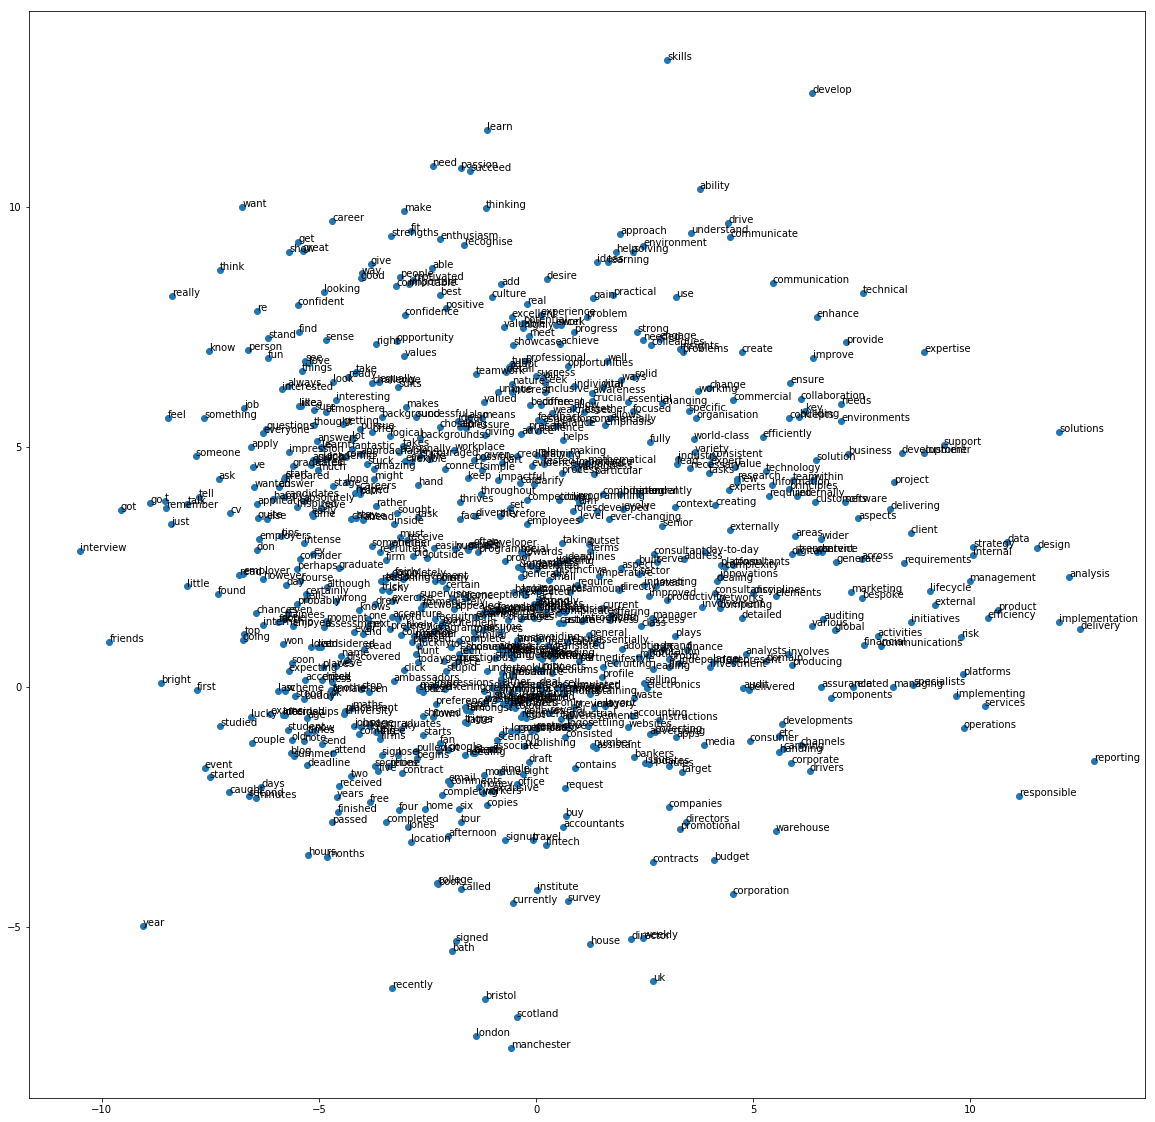

In [91]:
k=800
plt.figure(figsize=(20,20))
plt.scatter(result[:k, 0], result[:k, 1])
for i, word in enumerate(words[:k]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [92]:
model.wv.most_similar(positive="job")

[('role', 0.37755876779556274),
 ('something', 0.3309421241283417),
 ('jobs', 0.2918728291988373),
 ('answers', 0.2590550482273102),
 ('think', 0.24697259068489075),
 ('on-the-job', 0.23940682411193848),
 ('go', 0.23917853832244873),
 ('time', 0.23674321174621582),
 ('scheme', 0.23543617129325867),
 ('career', 0.2350296974182129)]

In [93]:
model.wv.most_similar(positive="pwc")

[('deloitte', 0.41054055094718933),
 ('ey', 0.4064263701438904),
 ('kpmg', 0.32173460721969604),
 ('accenture', 0.26365602016448975),
 ('firm', 0.2516742944717407),
 ('mckinsey', 0.23449558019638062),
 ('bcg', 0.2343018651008606),
 ('bp', 0.23139825463294983),
 ('first', 0.2313176393508911),
 ('bdo', 0.230194553732872)]

In [94]:
model.wv.most_similar(positive="p&g")

[('manufacturing', 0.26126596331596375),
 ('academy', 0.2514874339103699),
 ('marsh', 0.2405952662229538),
 ('zopa', 0.23706530034542084),
 ('procter', 0.22556394338607788),
 ('bcg', 0.22137120366096497),
 ('retail', 0.20799201726913452),
 ('fawley', 0.2061016857624054),
 ('unilever', 0.20554962754249573),
 ('lseg', 0.20489700138568878)]

In [95]:
model.wv.most_similar(positive="success")

[('successes', 0.2442394644021988),
 ('succeed', 0.23959697782993317),
 ('evolution', 0.23908862471580505),
 ('believe', 0.23884305357933044),
 ('growth', 0.23345620930194855),
 ('lps', 0.23299236595630646),
 ('goals', 0.23171061277389526),
 ('mission', 0.23120847344398499),
 ('stronger', 0.21748025715351105),
 ('mark', 0.2159152776002884)]

In [96]:
model.wv.most_similar(positive="oxford")

[('swansea', 0.4943997263908386),
 ('exeter', 0.4779215455055237),
 ('leiden', 0.47745510935783386),
 ('northwestern', 0.4731888771057129),
 ('yale', 0.4727858901023865),
 ('bedfordshire', 0.46815627813339233),
 ('cambridge', 0.46499669551849365),
 ('cork', 0.4631390869617462),
 ('glamorgan', 0.4613947868347168),
 ('kingston', 0.4603070318698883)]

In [97]:
model.wv.most_similar(positive="cv")

[('application', 0.41685131192207336),
 ('letter', 0.36836063861846924),
 ('resume', 0.32086870074272156),
 ('interview', 0.2777271866798401),
 ('cvs', 0.2604815363883972),
 ('paste', 0.2565624713897705),
 ('please', 0.2504459023475647),
 ('spelling', 0.24736014008522034),
 ('button', 0.24025259912014008),
 ('grammar', 0.2377214878797531)]

In [98]:
model.wv.most_similar(positive="event")

[('events', 0.43161460757255554),
 ('festival', 0.3917214274406433),
 ('dinner', 0.3594071567058563),
 ('conference', 0.322238564491272),
 ('fairs', 0.3053211569786072),
 ('network', 0.30323314666748047),
 ('panel', 0.3010234236717224),
 ('bright', 0.2947812080383301),
 ('keynote', 0.2883758544921875),
 ('session', 0.2831445038318634)]

In [99]:
model.wv.most_similar(positive="consulting")

[('consultancy', 0.46371710300445557),
 ('consultant', 0.32463082671165466),
 ('advisory', 0.31518614292144775),
 ('consultancies', 0.29536306858062744),
 ('consultants', 0.292752206325531),
 ('specialise', 0.2676030993461609),
 ('specialising', 0.2673499584197998),
 ('actuarial', 0.25676169991493225),
 ('fs', 0.2529527544975281),
 ('accountancy', 0.2515971064567566)]

In [100]:
model.wv.most_similar(positive="lawyers")

[('law', 0.38833087682724),
 ('trainees', 0.34081441164016724),
 ('solicitors', 0.3376504182815552),
 ('lawyer', 0.31771379709243774),
 ('professionals', 0.3012339472770691),
 ('firms', 0.27420610189437866),
 ('bankers', 0.27219030261039734),
 ('colleagues', 0.2673409879207611),
 ('solicitor', 0.2670655846595764),
 ('earners', 0.2647358179092407)]

In [101]:
model.wv.most_similar(positive="internship")

[('placement', 0.5602884888648987),
 ('internships', 0.5129470825195312),
 ('intern', 0.5064002275466919),
 ('spring', 0.410677969455719),
 ('graduate', 0.39900243282318115),
 ('analyst', 0.39130330085754395),
 ('summer', 0.3463412821292877),
 ('interns', 0.3450648784637451),
 ('programme', 0.32457971572875977),
 ('vacation', 0.324224054813385)]

In [102]:
model.wv.most_similar(positive="marketing")

[('sales', 0.43062931299209595),
 ('advertising', 0.3690612316131592),
 ('rpo', 0.3517363667488098),
 ('bb', 0.34572961926460266),
 ('product', 0.3393361568450928),
 ('pr', 0.3372676372528076),
 ('brand', 0.3334190547466278),
 ('merchandising', 0.33025139570236206),
 ('communications', 0.3262457847595215),
 ('media', 0.3253505825996399)]

In [104]:
model.wv.most_similar(positive="members")

[('member', 0.4076705574989319),
 ('students', 0.3690815567970276),
 ('colleagues', 0.30107372999191284),
 ('graduates', 0.2952403128147125),
 ('professionals', 0.28115975856781006),
 ('people', 0.27509021759033203),
 ('lawyers', 0.25481387972831726),
 ('partners', 0.2517860531806946),
 ('undergraduates', 0.2500903606414795),
 ('individuals', 0.2478342056274414)]

In [107]:
model["marketing"].shape

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(200,)